<a href="https://colab.research.google.com/github/rwothani/Rachel_myrepo/blob/master/matrix_based_rgb_drawing_sliders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===== Step 1: Import Libraries (if not already imported) =====
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Dropdown
from IPython.display import display
import os

# ===== Step 2: Setup folder & counter (if not already done) =====
save_folder = "matrix_images_rgb"
os.makedirs(save_folder, exist_ok=True)
image_counter = 1

# ===== Step 3: Initialize RGB Matrix =====
height, width = 50, 50
current_matrix = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# ===== Step 4: Function to Display and Save Image =====
def display_and_save_rgb(matrix, description="PixelEdit"):
    global image_counter
    img = Image.fromarray(matrix, mode='RGB')

    # Display inline
    plt.imshow(matrix)
    plt.axis('off')
    plt.show()

    # Save with numbered filename
    filename = f"{description}_{image_counter}.png"
    filepath = os.path.join(save_folder, filename)
    img.save(filepath)
    print(f"Image saved as {filepath}")

    image_counter += 1

# ===== Step 5: Interactive Per-Pixel Editor =====
def edit_pixel_rgb(x=0, y=0, R=128, G=128, B=128):
    global current_matrix
    current_matrix[x, y] = [R, G, B]
    display_and_save_rgb(current_matrix, description=f"pixel_{x}_{y}")

# Sliders for x, y, R, G, B
interact(edit_pixel_rgb,
         x=IntSlider(min=0, max=height-1, step=1, value=0, description='Row'),
         y=IntSlider(min=0, max=width-1, step=1, value=0, description='Col'),
         R=IntSlider(min=0, max=255, step=1, value=128, description='Red'),
         G=IntSlider(min=0, max=255, step=1, value=128, description='Green'),
         B=IntSlider(min=0, max=255, step=1, value=128, description='Blue'));


interactive(children=(IntSlider(value=0, description='Row', max=49), IntSlider(value=0, description='Col', max…

In [2]:
# New matrix size
height, width = 100, 100  # Can also try 256, 256

# Initialize RGB matrix
current_matrix = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)


In [3]:
def fill_rectangle(matrix, x_start, y_start, width_rect, height_rect, color):
    x_end = min(x_start + width_rect, matrix.shape[0])
    y_end = min(y_start + height_rect, matrix.shape[1])
    matrix[x_start:x_end, y_start:y_end] = color
    return matrix

def draw_horizontal_line(matrix, row, color):
    matrix[row, :] = color
    return matrix

def draw_vertical_line(matrix, col, color):
    matrix[:, col] = color
    return matrix

def draw_circle(matrix, center_x, center_y, radius, color):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center_x)**2 + (j - center_y)**2 <= radius**2:
                matrix[i, j] = color
    return matrix


In [4]:
from ipywidgets import IntSlider, interact

def interactive_rectangle(x=0, y=0, w=10, h=10, R=128, G=128, B=128):
    color = [R, G, B]
    fill_rectangle(current_matrix, x, y, w, h, color)
    display_and_save_rgb(current_matrix, description="rect_edit")

interact(interactive_rectangle,
         x=IntSlider(min=0, max=height-1, value=0),
         y=IntSlider(min=0, max=width-1, value=0),
         w=IntSlider(min=1, max=width, value=10),
         h=IntSlider(min=1, max=height, value=10),
         R=IntSlider(min=0, max=255, value=128),
         G=IntSlider(min=0, max=255, value=128),
         B=IntSlider(min=0, max=255, value=128));


interactive(children=(IntSlider(value=0, description='x', max=99), IntSlider(value=0, description='y', max=99)…

/tmp/ipython-input-2521258737.py:21: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(matrix, mode='RGB')


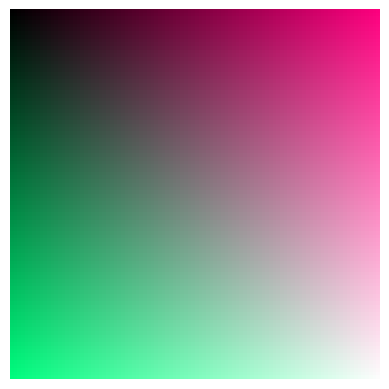

Image saved as matrix_images_rgb/gradient_initial_112.png


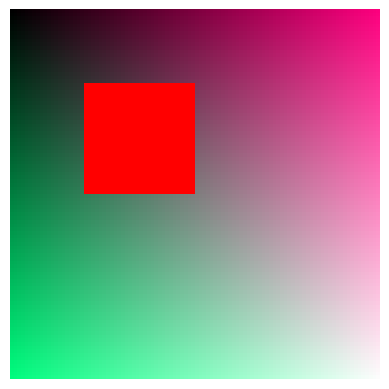

Image saved as matrix_images_rgb/gradient_rect_edit_113.png


In [6]:
def gradient_pattern_rgb(height, width):
    matrix = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            # Simple gradient from black to red, green, blue across the image
            matrix[i, j, 0] = int(255 * (j / width))
            matrix[i, j, 1] = int(255 * (i / height))
            matrix[i, j, 2] = int(255 * ((i + j) / (height + width)))
    return matrix

# Start with pattern
current_matrix = gradient_pattern_rgb(height, width)
display_and_save_rgb(current_matrix, description="gradient_initial")

# Then edit rectangle
fill_rectangle(current_matrix, 20, 20, 30, 30, [255,0,0])  # Red rectangle
display_and_save_rgb(current_matrix, description="gradient_rect_edit")